#1 correct annotations.

In [43]:
import os
import cv2
import numpy as np
from glob import glob
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras import layers
from PIL import Image
import albumentations as A

from scipy.io import loadmat
import matplotlib.pyplot as plt

# from numpngw import write_png

In [44]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [45]:
### source :
src_image_path = '/content/drive/MyDrive/Colab Notebooks/suadd/inputs/'
src_mask_path = '/content/drive/MyDrive/Colab Notebooks/suadd/semantic_annotations/'

### destination
image_corrected_path = '/content/drive/MyDrive/Colab Notebooks/suadd/inputs_corrected/'
mask_corrected_path  = '/content/drive/MyDrive/Colab Notebooks/suadd/semantic_annotations_corrected/'

In [46]:
import shutil


images = [x.split('/')[-1] for x in glob(src_image_path+'*')]
print(len(images))

for e,p in enumerate(images):
    #images:
    src_img, dst_img = src_image_path + p, image_corrected_path + p
    shutil.copyfile(src_img, dst_img)
    
    #masks:
    src_msk, dst_msk = src_mask_path + p, mask_corrected_path + p
    shutil.copyfile(src_msk, dst_msk)

1786


In [47]:
len(glob(src_image_path+'*')), len(glob(image_corrected_path+'*'))

(1786, 1786)

In [48]:
len(glob(src_mask_path+'*')), len(glob(mask_corrected_path+'*'))

(1786, 1786)

In [61]:
imgcorr = [x.split('/')[-1] for x in glob(image_corrected_path+'*')]
imgorig = [x.split('/')[-1] for x in glob( src_image_path+'*')]
[x for x in imgorig if x not in imgcorr]

['7e268c3dba8941bdafb5802cf5fbd39c-1617817176900003195.png',
 '7e268c3dba8941bdafb5802cf5fbd39c-1617817172600003102.png',
 '7e268c3dba8941bdafb5802cf5fbd39c-1617817201300003676.png',
 'd7bf309a43af485d9ba6e80598407468-1621891254300015829.png',
 'd7bf309a43af485d9ba6e80598407468-1621891247800015716.png',
 'd7bf309a43af485d9ba6e80598407468-1621891239100015531.png',
 'db86f9a4c2fd4e60bcf24b057d08c305-1621364840800015270.png',
 'd7bf309a43af485d9ba6e80598407468-1621891235400015461.png',
 'd7bf309a43af485d9ba6e80598407468-1621891244100015628.png',
 '1c388129c6a94ef883e4f8cfb8ea3046-1620064829500004148.png',
 '1c4b651a263f41c791776fee50e4fca6-1612396209800010938.png',
 '1c388129c6a94ef883e4f8cfb8ea3046-1620064843500004415.png',
 '1c388129c6a94ef883e4f8cfb8ea3046-1620064847200004494.png',
 '1c388129c6a94ef883e4f8cfb8ea3046-1620064838400004322.png',
 '24e1ca478c16444996087dbed204ec3c-1615925250100007380.png',
 '1c388129c6a94ef883e4f8cfb8ea3046-1620064831800004177.png',
 '283c221560de4260b9de62

In [65]:
imgcorr = [x.split('/')[-1] for x in glob(mask_corrected_path+'*')]
imgorig = [x.split('/')[-1] for x in glob( src_mask_path+'*')]
[x for x in imgorig  if x not in imgcorr]

['d7bf309a43af485d9ba6e80598407468-1621891244100015628.png',
 '6ae31c29c6af45bcb30aa8d326284fcf-1658289196700011380.png',
 '6ae31c29c6af45bcb30aa8d326284fcf-1658289194700011340.png',
 '6ae31c29c6af45bcb30aa8d326284fcf-1658289193000011300.png',
 '7e268c3dba8941bdafb5802cf5fbd39c-1617817168300003007.png',
 '7e268c3dba8941bdafb5802cf5fbd39c-1617817179800003243.png',
 'd7bf309a43af485d9ba6e80598407468-1621891235400015461.png',
 '7e268c3dba8941bdafb5802cf5fbd39c-1617817176900003195.png',
 '6ae31c29c6af45bcb30aa8d326284fcf-1658289192200011308.png',
 '7e268c3dba8941bdafb5802cf5fbd39c-1617817172600003102.png',
 'd7bf309a43af485d9ba6e80598407468-1621891247800015716.png',
 '6ae31c29c6af45bcb30aa8d326284fcf-1658289200400011471.png',
 '7e268c3dba8941bdafb5802cf5fbd39c-1617817201300003676.png',
 'd7bf309a43af485d9ba6e80598407468-1621891254300015829.png',
 '1c388129c6a94ef883e4f8cfb8ea3046-1620064829500004148.png',
 '1c388129c6a94ef883e4f8cfb8ea3046-1620064831800004177.png',
 '1c388129c6a94ef883e4f8

In [52]:
# check mask vs image shape

In [66]:
img_name = 'a219be9df80b4431bd952700b840262f-1622741974400009778'

print(cv2.imread(image_corrected_path+img_name+'.png').shape)
print(cv2.imread(mask_corrected_path+img_name+'.png').shape)

(2200, 1550, 3)
(2200, 1550, 3)


In [67]:
img_name = 'aebae6ef758540f28814cc34e43b1952-1619035678800002304'

print(cv2.imread(image_corrected_path+img_name+'.png').shape)
print(cv2.imread(mask_corrected_path+img_name+'.png').shape)

(2200, 1550, 3)
(2200, 1550, 3)


In [55]:
# delete both picture and mask:

In [68]:
delete_pict_list = [
    
# 'db86f9a4c2fd4e60bcf24b057d08c305-1621364840800015270.png': completely wrong mask 
['db86f9a4c2fd4e60bcf24b057d08c305-1621364840800015270'],
    
# 'ca17c81d845b48f48097b30db1ddbd37-1634665870100002002.png' #grass bottom right + chg soil to gravel
['ca17c81d845b48f48097b30db1ddbd37-1634665870100002002'],
    
    
    
# d7654235185945ae94acff5bc50e1c73-1618249639400009980.png: soil or gravel on top left
['d7654235185945ae94acff5bc50e1c73-1618249639400009980'],  
    
# e25f17a327004f8988b168e9c7ddd52c-1619038563500008344.png: prob grass / soil insoluble
['e25f17a327004f8988b168e9c7ddd52c-1619038563500008344'],
    
# ed4a3859216a48db8b6d04eed5aacdc5-1618343945500005725.png: lot of gravel annotated as grass  
['ed4a3859216a48db8b6d04eed5aacdc5-1618343945500005725'],
    
    
['1c4b651a263f41c791776fee50e4fca6-1612396209800010938.png'], # wrong annotations and duplicate
    
    
    
# '1c388129c6a94ef883e4f8cfb8ea3046-1620064838400004322.png', delete  # series has series of mistakes btw gravel, grass and soil // 4322 is a mess
# '7e268c3dba8941bdafb5802cf5fbd39c-1617817179800003243.png' : inconsistent label btw series  // delete all series
# '6ae31c29c6af45bcb30aa8d326284fcf-1658289192200011308.png' : series is attrocious: delete
# 'd7bf309a43af485d9ba6e80598407468-1621891235400015461.png' : delete entire series // duplicate is better
    
['1c388129c6a94ef883e4f8cfb8ea3046-1620064838400004322.png',
 '1c388129c6a94ef883e4f8cfb8ea3046-1620064831800004177.png',
 '1c388129c6a94ef883e4f8cfb8ea3046-1620064847200004494.png',
 '1c388129c6a94ef883e4f8cfb8ea3046-1620064843500004415.png',
 '1c388129c6a94ef883e4f8cfb8ea3046-1620064829500004148.png'],
['7e268c3dba8941bdafb5802cf5fbd39c-1617817179800003243.png',
 '7e268c3dba8941bdafb5802cf5fbd39c-1617817201300003676.png',
 '7e268c3dba8941bdafb5802cf5fbd39c-1617817168300003007.png',
 '7e268c3dba8941bdafb5802cf5fbd39c-1617817172600003102.png',
 '7e268c3dba8941bdafb5802cf5fbd39c-1617817176900003195.png'],
['6ae31c29c6af45bcb30aa8d326284fcf-1658289192200011308.png',
 '6ae31c29c6af45bcb30aa8d326284fcf-1658289200400011471.png',
 '6ae31c29c6af45bcb30aa8d326284fcf-1658289194700011340.png',
 '6ae31c29c6af45bcb30aa8d326284fcf-1658289196700011380.png',
 '6ae31c29c6af45bcb30aa8d326284fcf-1658289193000011300.png'],
['d7bf309a43af485d9ba6e80598407468-1621891235400015461.png',
 'd7bf309a43af485d9ba6e80598407468-1621891244100015628.png',
 'd7bf309a43af485d9ba6e80598407468-1621891239100015531.png',
 'd7bf309a43af485d9ba6e80598407468-1621891247800015716.png',
 'd7bf309a43af485d9ba6e80598407468-1621891254300015829.png'],
      
['283c221560de4260b9de627416669e53-1627405376600001645.png'], # delete ## need to convert anything below 450 vertically from asphalt to concreate: can be delete
['24e1ca478c16444996087dbed204ec3c-1615925250100007380.png'], #delete ## no asphalt in other picture above fence / pb of annotations

['db86f9a4c2fd4e60bcf24b057d08c305-1621364840800015270.png'], #delete : mask is completely off    
   
]



delete_pict_list = [item for sublist in delete_pict_list for item in sublist]
len(delete_pict_list)

29

In [69]:
import os

img_tocheck = glob(image_corrected_path + '*')

for file_name in delete_pict_list:
    if image_corrected_path+file_name in img_tocheck:
        print(image_corrected_path+file_name)
        print(mask_corrected_path+file_name)
        os.remove(image_corrected_path+file_name)
        os.remove(mask_corrected_path+file_name) 

In [70]:
len(glob(image_corrected_path+'*'))==len(glob(mask_corrected_path+'*')), len(glob(image_corrected_path+'*'))

(True, 1762)

In [72]:
imgcorr = [x.split('/')[-1] for x in glob(mask_corrected_path+'*')]
imgorig = [x.split('/')[-1] for x in glob( image_corrected_path+'*')]
[x for x in imgorig  if x not in imgcorr], [x for x in  imgcorr if x not in imgorig ], 

([], [])

In [73]:
## change of categories

In [74]:
entire_pict_list = [
['6d8ed4d362f94d20a80a026f52a4f4fd-1660188014600002457.png', 4 ,5],
['a340eaa5cece4f49ad275f67bc160f2c-1621445435700005536.png', 4 ,5],
['1916de35835548a8950b114d179502a3-1617745442700001171.png', 4 ,5],
['748f7ecdd8434553a7a8d341eda4419e-1621279538000003535.png', 8 ,7],
['748f7ecdd8434553a7a8d341eda4419e-1621279542400003621.png', 8 ,7],
['748f7ecdd8434553a7a8d341eda4419e-1621279538000003535.png', 4 ,3],
['054c11733d3e4ea79458cb2dace13be3-1620062827700003617.png', 12 ,10],
['064d495622994e1ab3dfda24db78addf-1660187325500010182.png', 14 ,9],
['283c221560de4260b9de627416669e53-1627405376600001645.png', 14 ,7],
['064d495622994e1ab3dfda24db78addf-1660187325500010182.png', 14 ,6],
['064d495622994e1ab3dfda24db78addf-1660187328000010228.png', 15 ,9],
['a65d20d4d98f4d4bad3f395a2c5fcc87-1615327880600007875.png', 15 ,9],
['9fa0676490b744c1b04f205704f91d43-1614811731500009710.png', 15 ,5],
['490999536d194a53bde8ddcff6994824-1617210399400005009.png', 15 ,255],
['1716b622a6cb42828e61a5546317a437-1616446321300003515.png', 15 ,13],
['072b9f864f8f445485df414fbed70cd4-1613601058600003328.png', 9 ,6],
['38d2bca981394980b26a2943d1d7c2f0-1624901637500004269.png', 9 ,11],

 
##### 5b6112c35a524fa4acedb076fb72feac : series: change soil to gravel
['5b6112c35a524fa4acedb076fb72feac-1617744843300005726.png', 13, 12],
['5b6112c35a524fa4acedb076fb72feac-1617744803100004899.png', 13, 12],
['5b6112c35a524fa4acedb076fb72feac-1617744807600004999.png', 13, 12],
['5b6112c35a524fa4acedb076fb72feac-1617744812000005085.png', 13, 12],
['5b6112c35a524fa4acedb076fb72feac-1617744867900006199.png', 13, 12],   
    
# #### 1c4b651a263f41c791776fee50e4fca6-1612396209800010938.png : series : change grass to soil - series has snow dots      
# ['1c4b651a263f41c791776fee50e4fca6-1612396217500011099'],
# ['1c4b651a263f41c791776fee50e4fca6-1612396210300010971',2, 13], ### remove wrong annotations and duplicate
# ['1c4b651a263f41c791776fee50e4fca6-1612396209800010938'],
# ['1c4b651a263f41c791776fee50e4fca6-1612396213900011027'],
# ['1c4b651a263f41c791776fee50e4fca6-1612396205200010860'],   

    
    
# 6ae31c29c6af45bcb30aa8d326284fcf-1658289196700011380.png: series : pb grass / gravel
['6ae31c29c6af45bcb30aa8d326284fcf-1658289200400011471.png', 2, 255],    
['6ae31c29c6af45bcb30aa8d326284fcf-1658289200400011471.png', 12, 255], 

['6ae31c29c6af45bcb30aa8d326284fcf-1658289194700011340.png', 2, 255],    
['6ae31c29c6af45bcb30aa8d326284fcf-1658289194700011340.png', 12, 255],

['6ae31c29c6af45bcb30aa8d326284fcf-1658289196700011380.png', 2, 255],    
['6ae31c29c6af45bcb30aa8d326284fcf-1658289196700011380.png', 12, 255],

['6ae31c29c6af45bcb30aa8d326284fcf-1658289192200011308.png', 2, 255],    
['6ae31c29c6af45bcb30aa8d326284fcf-1658289192200011308.png', 12, 255],

['6ae31c29c6af45bcb30aa8d326284fcf-1658289193000011300.png', 2, 255],    
['6ae31c29c6af45bcb30aa8d326284fcf-1658289193000011300.png', 12, 255],

        
# aebae6ef758540f28814cc34e43b1952-1619035678800002304.png: the road shall be asphalt instead of concrete
['aebae6ef758540f28814cc34e43b1952-1619035678800002304', 10, 255],     
    
    
    
['064d495622994e1ab3dfda24db78addf-1660187328000010228.png', 15, 255],#no snow
['1716b622a6cb42828e61a5546317a437-1616446321300003515.png', 15, 255],# no snow

['1012f99c2c6149fd8d9673bdf54155d5-1616446840900003156.png', 8, 255], ## not wire, facade or 255
['1012f99c2c6149fd8d9673bdf54155d5-1616446846600003265.png', 8, 255], ## not wire, facade or 255
['1012f99c2c6149fd8d9673bdf54155d5-1616446850800003345.png', 8, 255], ## not wire, facade or 
['1012f99c2c6149fd8d9673bdf54155d5-1616446852900003400.png', 8, 255],  ## not wire, facade or 255
['14c532a8627845af80a102597063b072-1621449119600012235.png', 8, 255], # ## no wire fence
['14c532a8627845af80a102597063b072-1621449123600012307.png', 8, 255], # no wire fence
['14c532a8627845af80a102597063b072-1621449129100012409.png', 8, 255], # no wire fence
['14c532a8627845af80a102597063b072-1621449131800012457.png', 8, 255], # no wire fence
['2926994c8b60434ea9b9d6886f359fc3-1619109308700004742.png', 8, 255], # #no wire
['2926994c8b60434ea9b9d6886f359fc3-1619109318300004941.png', 8, 255], # # no wire
['2926994c8b60434ea9b9d6886f359fc3-1619109322200005021.png', 8, 255], # #no wire
['2d000465163546eaa8287ab57c091a9d-1619718229600006697.png', 8, 255], # #no wire
['3170e46abf8e4974bb0578b435743366-1617214532400014689.png', 8, 255], # no wire
['344f520a2b0c407e9b22a516e03f49e9-1619647007200004576.png', 8, 255], # no wire
['369eb1158f204016bb6d4509a4f72005-1644861999900002933.png', 8, 255], # no wire
['3906767d75c44ba786670ea11765528f-1620680183500027396.png', 8, 255], # no a cable
['3a915024fd15488cb4b8fe5762548a4b-1622586018400007185.png', 8, 255], # no wire
['3d48491db6be4e5c807b29c49511d2e6-1612892348000001756.png', 8, 255], # no wire
['412936ec1839402ca39745135e684364-1629667273300002772.png', 8, 255], # no wire
['490999536d194a53bde8ddcff6994824-1617210399400005009.png', 8, 255], # no wire
['490999536d194a53bde8ddcff6994824-1617210407200005147.png', 8, 255], # no wire
['490999536d194a53bde8ddcff6994824-1617210411200005237.png', 8, 255], # no wire
['5039e0e97ac748e0b7c398bd84117a74-1606950267000013875.png', 8, 255], # no wire
['5039e0e97ac748e0b7c398bd84117a74-1606950288800014308.png', 8, 255], # no wire
['54ae0a04fd24424ab9b73f1a804dcaee-1624551240600003033.png', 8, 255], # no wire
['54ae0a04fd24424ab9b73f1a804dcaee-1624551240600003033.png', 8, 255], # no wire
['54ae0a04fd24424ab9b73f1a804dcaee-1624551245200003110.png', 8, 255], # no wire
['54ae0a04fd24424ab9b73f1a804dcaee-1624551248300003178.png', 8, 255], # no wire
['7c271774b5d943038775112dc2dd7af8-1623362738300006540.png', 8, 255], # no wire
['bf1925dff2f942b1a3d01462661be818-1632161439300006590.png', 8, 255], # no wire


    
['064d495622994e1ab3dfda24db78addf-1660187328000010228.png', 15, 9], # snow to furniture    
    
    
['072b9f864f8f445485df414fbed70cd4-1613601062100003400.png', 10, 1],   ## all concrete is asphalt
['072b9f864f8f445485df414fbed70cd4-1613601069100003528.png', 10, 1],
['072b9f864f8f445485df414fbed70cd4-1613601079600003740.png', 10, 1],
['072b9f864f8f445485df414fbed70cd4-1613601058600003328.png', 10, 1],
['072b9f864f8f445485df414fbed70cd4-1613601066700003487.png', 10, 1],
    
['1916de35835548a8950b114d179502a3-1617745442700001171.png', 4, 255], #no animal: two humans and two high vegetation
['6d8ed4d362f94d20a80a026f52a4f4fd-1660188025100002674.png', 4, 5],   ## not an animal but high vegetation

['064d495622994e1ab3dfda24db78addf-1660187328000010228.png', 15, 255],#no snow

['1716b622a6cb42828e61a5546317a437-1616446321300003515.png', 15, 255], #no snow

['1012f99c2c6149fd8d9673bdf54155d5-1616446852900003400.png', 13, 2],  ## messy missing grass / inconsistent annotations
['1012f99c2c6149fd8d9673bdf54155d5-1616446846600003265.png', 13, 2],  ## messy missing grass / inconsistent annotations
['1012f99c2c6149fd8d9673bdf54155d5-1616446859300003509.png', 13, 2],  ## messy missing grass / inconsistent annotations
['1012f99c2c6149fd8d9673bdf54155d5-1616446850800003345.png', 13, 2],   ## messy missing grass  / inconsistent annotations

['14c532a8627845af80a102597063b072-1621449118200012195.png', 7, 11],

['1716b622a6cb42828e61a5546317a437-1616446315700003395.png', 13, 2], ## same as 1012f99c2c6149fd8d9673bdf54155d5-1616446852900003400.png

['1c4b651a263f41c791776fee50e4fca6-1612396209800010938.png', 13, 2],
['1c4b651a263f41c791776fee50e4fca6-1612396205200010860.png', 13, 2],  # series has series of mistakes btw gravel, grass and soil
['30ed15a9d0564ff384747d86e4742fcb-1613514533100006226.png', 9, 255], ## can't be garden funiture : might be roof or snow ???.... ## snow annotations is messy: missing roof and contains veg without snow
[ '30855d6156c145889253b6c4f5db670b-1620680984200008804.png', 13, 2],
['30855d6156c145889253b6c4f5db670b-1620681009600009291.png', 13, 2],
['30855d6156c145889253b6c4f5db670b-1620680987400008863.png', 13, 2],
['30855d6156c145889253b6c4f5db670b-1620680993700008996.png', 13, 2],
['30855d6156c145889253b6c4f5db670b-1620681025400009620.png', 13, 2],
['2c8b4afe3f0b4724a2fcf8b17415bb94-1623093406600007450.png', 13, 2],
['5b6112c35a524fa4acedb076fb72feac-1617744807600004999.png', 13, 12],
['5b6112c35a524fa4acedb076fb72feac-1617744812000005085.png', 13, 12],
['5b6112c35a524fa4acedb076fb72feac-1617744867900006199.png', 13, 12],
['5b6112c35a524fa4acedb076fb72feac-1617744803100004899.png', 13, 12],



['6ae31c29c6af45bcb30aa8d326284fcf-1658289196700011380.png', 12, 13],  #???
['6ae31c29c6af45bcb30aa8d326284fcf-1658289200400011471.png', 12, 13], #???
['6ae31c29c6af45bcb30aa8d326284fcf-1658289194700011340.png', 12, 13], #???
['6ae31c29c6af45bcb30aa8d326284fcf-1658289192200011308.png', 12, 13], #???
['6ae31c29c6af45bcb30aa8d326284fcf-1658289193000011300.png', 12, 13], #???

['6734b86156ae4e26b39cb86be9d5edf7-1607635367100007668.png', 13, 2],
['6734b86156ae4e26b39cb86be9d5edf7-1607635363000007571.png', 13, 2],
['6734b86156ae4e26b39cb86be9d5edf7-1607635353800007404.png', 13, 2],
['6734b86156ae4e26b39cb86be9d5edf7-1607635360100007516.png', 13, 2],
['6734b86156ae4e26b39cb86be9d5edf7-1607635354900007420.png', 13, 2],

['64aef2ce8a1c438db0866641b19f2055-1617209471900004193.png', 13, 2],
['64aef2ce8a1c438db0866641b19f2055-1617209470200004165.png', 13, 2],

['7307f27e44184a4b94fa7998383c68cc-1617816027100009615.png', 13, 2], ## damned garden (triangle garden with grass/gravel) 
['7307f27e44184a4b94fa7998383c68cc-1617816011000009284.png', 13, 2],
['7307f27e44184a4b94fa7998383c68cc-1617816015200009370.png', 13, 2],
['7307f27e44184a4b94fa7998383c68cc-1617816008900009251.png', 13, 2],
['7307f27e44184a4b94fa7998383c68cc-1617816020800009475.png', 13, 2],

['7743e90f1205464696e4f72ac2f30108-1613586761200003194.png', 13, 255],
['7743e90f1205464696e4f72ac2f30108-1613586794800003873.png', 13, 255],
['7743e90f1205464696e4f72ac2f30108-1613586772800003423.png', 13, 255],
['7743e90f1205464696e4f72ac2f30108-1613586766400003286.png', 13, 255],
['7743e90f1205464696e4f72ac2f30108-1613586789700003760.png', 13, 255],

['6c28c151db94488a91952108f23deaa8-1617811400800031884.png', 13, 2],
['6c28c151db94488a91952108f23deaa8-1617811397600031816.png', 13, 2],
['6c28c151db94488a91952108f23deaa8-1617811386500031591.png', 13, 2],
['6c28c151db94488a91952108f23deaa8-1617811393600031752.png', 13, 2],
['6c28c151db94488a91952108f23deaa8-1617811389100031661.png', 13, 2],
['8de58b4322f74c0183ab633b8aefd0b6-1658374319200002046.png', 13, 2],

['a1cdb67568124e548a7c3ed0b0b9ce2e-1621447861100005773.png', 10, 255],
['a1cdb67568124e548a7c3ed0b0b9ce2e-1621447864700005844.png', 10, 255],

 #'a4dc322c09d3401aa7fcc1007fc1d867-1618941653200005820.png' : entire series 12=>255 and 13 => 255
[ 'a4dc322c09d3401aa7fcc1007fc1d867-1618941653200005820.png', 12, 255],
[ 'a4dc322c09d3401aa7fcc1007fc1d867-1618941619700005142.png', 12, 255],
[ 'a4dc322c09d3401aa7fcc1007fc1d867-1618941671000006183.png', 12, 255],
[ 'a4dc322c09d3401aa7fcc1007fc1d867-1618941617400005091.png', 12, 255],
[ 'a4dc322c09d3401aa7fcc1007fc1d867-1618941608500004918.png', 12, 255],

[ 'a4dc322c09d3401aa7fcc1007fc1d867-1618941653200005820.png', 13, 255],
[ 'a4dc322c09d3401aa7fcc1007fc1d867-1618941619700005142.png', 13, 255],
[ 'a4dc322c09d3401aa7fcc1007fc1d867-1618941671000006183.png', 13, 255],
[ 'a4dc322c09d3401aa7fcc1007fc1d867-1618941617400005091.png', 13, 255],
[ 'a4dc322c09d3401aa7fcc1007fc1d867-1618941608500004918.png', 13, 255],
['a5a83de959aa433a8b5b2d258804bc1c-1616704541800003254.png',13,2],
[ 'b219a4fc4d554ccd8d38b9d12d8a3eb6-1621447095900003236.png',13,1],
    
    
#   ca17c81d845b48f48097b30db1ddbd37-1634665870100002002.png : all series: 13 => 12 // confirmed and compared similar
 ['ca17c81d845b48f48097b30db1ddbd37-1634665870100002002.png', 13, 12],
 ['ca17c81d845b48f48097b30db1ddbd37-1634665908000002767.png', 13, 12],
 ['ca17c81d845b48f48097b30db1ddbd37-1634665868500001954.png', 13, 12],
 ['ca17c81d845b48f48097b30db1ddbd37-1634665879600002188.png', 13, 12],
 ['ca17c81d845b48f48097b30db1ddbd37-1634665863800001882.png', 13, 12],
 ['ca17c81d845b48f48097b30db1ddbd37-1634665870100002002.png', 13 , 255],
 
 ['c950ca48417b45978580d22f4e980b1d-1629563393500002323.png',10, 255],

 
 
 ['bb77c46dc5e34f55a6169bc6d1d37f0d-1624556129800051584.png', 13,2],
 ['bb77c46dc5e34f55a6169bc6d1d37f0d-1624556124600051477.png', 13,2],
 ['bb77c46dc5e34f55a6169bc6d1d37f0d-1624556122800051445.png', 13,2],
 ['bb77c46dc5e34f55a6169bc6d1d37f0d-1624556114800051284.png', 13,2],
 ['bb77c46dc5e34f55a6169bc6d1d37f0d-1624556118200051366.png', 13,2],
 
 ['c320bd182af84adcb2805aae192b1708-1615924545300008347.png', 2, 255],
 ['c320bd182af84adcb2805aae192b1708-1615924556900008564.png', 2, 255],
 ['c320bd182af84adcb2805aae192b1708-1615924563800008718.png', 2, 255],
 ['c320bd182af84adcb2805aae192b1708-1615924550700008452.png', 2, 255],
 ['c320bd182af84adcb2805aae192b1708-1615924546800008374.png', 2, 255],    
    
    

 
 ['d38dcf58f59142569e2f6b380ddecdc0-1655828539000016454.png', 1, 10],
 ['d7654235185945ae94acff5bc50e1c73-1618249639400009980.png',2, 255],
 ['e25f17a327004f8988b168e9c7ddd52c-1619038563500008344.png' ,2, 255],
 ['e25f17a327004f8988b168e9c7ddd52c-1619038559100008262.png' ,2, 255],
    
     
]

In [75]:
image_corrected_path, mask_corrected_path

('/content/drive/MyDrive/Colab Notebooks/suadd/inputs_corrected/',
 '/content/drive/MyDrive/Colab Notebooks/suadd/semantic_annotations_corrected/')

In [76]:
for chg_entire_cat in entire_pict_list:

    imgpath, init_cat, final_cat = chg_entire_cat
    try:
        mask_path = mask_corrected_path + imgpath


        mask = cv2.imread(mask_path)[:,:,0]
        init_cats = np.unique(mask)
        mask[mask==init_cat]=final_cat
        final_cats = np.unique(mask)

        print(init_cats)
        print(final_cats)

        cv2.imwrite(mask_path, mask.astype(np.uint8))
        print(mask.shape, mask.dtype)
    except:
        print('############### MASK NOT FOUND')

[  0   1   2   3   4   5   6   7   9  10  11  12 255]
[  0   1   2   3   5   6   7   9  10  11  12 255]
(2200, 1550) uint8
[  1   2   3   4   5   6   7   8   9  10  11  14 255]
[  1   2   3   5   6   7   8   9  10  11  14 255]
(2200, 1400) uint8
[  1   2   4   5   6   7  10  11  12  14 255]
[  1   2   5   6   7  10  11  12  14 255]
(2200, 1400) uint8
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14 255]
[  1   2   3   4   5   6   7   9  10  11  12  13  14 255]
(2200, 1550) uint8
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14 255]
[  1   2   3   4   5   6   7   9  10  11  12  13  14 255]
(2200, 1550) uint8
[  1   2   3   4   5   6   7   9  10  11  12  13  14 255]
[  1   2   3   5   6   7   9  10  11  12  13  14 255]
(2200, 1550) uint8
[  2   3   5   6   7   9  10  11  12  13  14 255]
[  2   3   5   6   7   9  10  11  13  14 255]
(2200, 1550) uint8
[  0   1   2   3   5   6   7   9  10  11  14 255]
[  0   1   2   3   5   6   7   9  10  11 255]
(2200, 1550) uint8
########

In [77]:
# Partial:

In [78]:
partial_chg_list =[

['60e13aa1f2d04d8981f6c65b08e4dea7-1620764350300006497', [0,900,0,800],  14, 5],
['872c27808cf14eb0bd37346eb4d7bc4f-1618856199500002862', [0,700, 0,3000], 14, 5], #	all above 700
['98daa55e493646488defa00b4b7c097c-1617919905800006996', [1150,3000,0,3000], 14, 5], #	all below 1150	
['7743e90f1205464696e4f72ac2f30108-1613586766400003286', [0,1200, 0,800], 255, 1], #	corner right up    
    
]

In [79]:
image_corrected_path, mask_corrected_path

('/content/drive/MyDrive/Colab Notebooks/suadd/inputs_corrected/',
 '/content/drive/MyDrive/Colab Notebooks/suadd/semantic_annotations_corrected/')

(2200, 1550)
(2200, 1550)
(2200, 1550)
(2250, 1500)


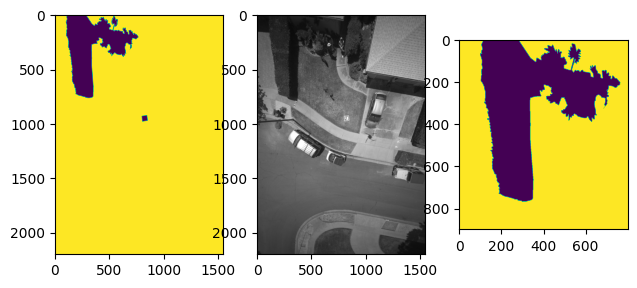

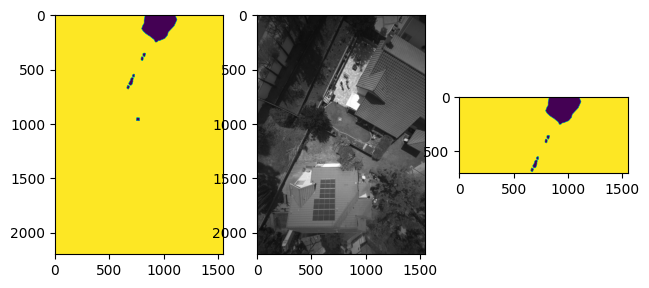

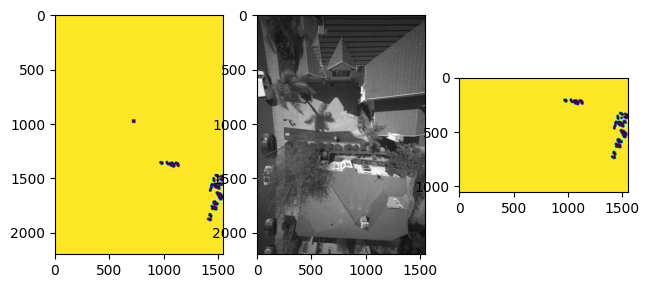

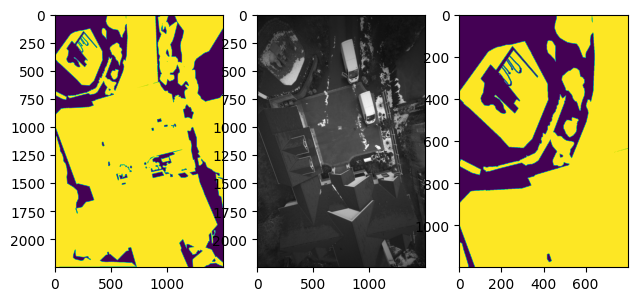

In [80]:

for partial_chg in partial_chg_list:


    img_name, cutimg, init_cat, final_cat = partial_chg


    imgpath = img_name +'.png'



    maskpath = mask_corrected_path + imgpath
    mask = cv2.imread(maskpath)[:,:,0]


    plt.figure(figsize=(10,10))
    plt.subplot(1,4,1)
    plt.imshow(np.where(mask==init_cat,0,255))

    plt.subplot(1,4,2)
    plt.imshow(cv2.imread(image_corrected_path+imgpath))

    plt.subplot(1,4,3)
    mask_cut = mask[cutimg[0]:cutimg[1], cutimg[2]:cutimg[3]].copy()
    plt.imshow(np.where(mask_cut==init_cat,0,255))



    mask_cut[mask_cut==init_cat]=final_cat

    mask[cutimg[0]:cutimg[1], cutimg[2]:cutimg[3]] = mask_cut

    cv2.imwrite(mask_path, mask)
    print(mask.shape)


In [81]:
except_area_pict = [
['094bef906bfa47fcb41e198b3741ec63-1621449103800005394', [750, 1000,700,1000], 14, 255], #	except 800 :1000,  800:1000	
['07ffbc6fbddd455db768295fce6c9f53-1618352098000015077', [800, 1000,800,1000] , 14, 9],     #	except 800:1000 800:1000	
    
['fdf84a60d8a7441c8ab130a7ec4bf78d-1617729146500005804', [1000, 1500,200,500] , 13, 2],     
['fdf84a60d8a7441c8ab130a7ec4bf78d-1617729150600005887', [1000, 1500,200,500] , 13, 2],   
    
]

In [82]:
image_corrected_path, mask_corrected_path

('/content/drive/MyDrive/Colab Notebooks/suadd/inputs_corrected/',
 '/content/drive/MyDrive/Colab Notebooks/suadd/semantic_annotations_corrected/')

(2200, 1500)
(2250, 1550)
(2200, 1400)
(2200, 1400)


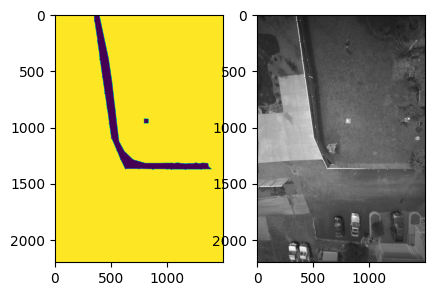

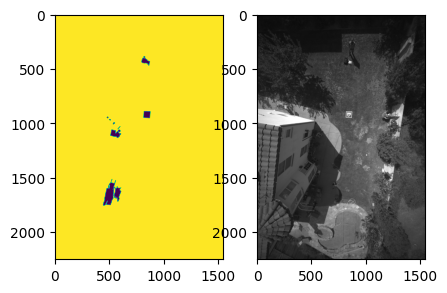

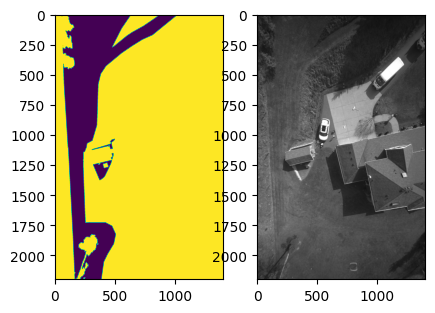

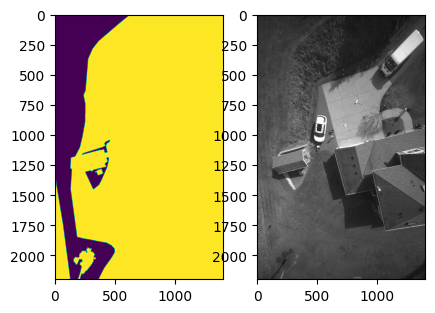

In [83]:
for partial_chg in except_area_pict:


    img_name, cutimg, init_cat, final_cat = partial_chg
    imgpath = img_name +'.png'
    maskpath = mask_corrected_path + imgpath   
    
    mask = cv2.imread(maskpath)[:,:,0]


    plt.figure(figsize=(10,10))
    plt.subplot(1,4,1)
    plt.imshow(np.where(mask==init_cat,0,255))

    plt.subplot(1,4,2)
    plt.imshow(cv2.imread(image_corrected_path+imgpath))

    # plt.subplot(1,4,3)
    mask_cut = mask[cutimg[0]:cutimg[1], cutimg[2]:cutimg[3]].copy()

    mask[mask==init_cat] = final_cat
    mask[cutimg[0]:cutimg[1], cutimg[2]:cutimg[3]] = mask_cut
    
    cv2.imwrite(maskpath, mask)
    print(mask.shape)

In [84]:
# Correct primeair marquer using cvat:

In [85]:
image_corrected_path, mask_corrected_path

('/content/drive/MyDrive/Colab Notebooks/suadd/inputs_corrected/',
 '/content/drive/MyDrive/Colab Notebooks/suadd/semantic_annotations_corrected/')

In [86]:
listofprimeaircorrection = glob('/content/drive/MyDrive/Colab Notebooks/suadd/task_primeairfull-2023_03_01_13_40_24-segmentation mask 1.1.zip (Unzipped Files)/SegmentationClass/inputs_primeair/*')
len(listofprimeaircorrection)

61

In [87]:
mskcorr = [x.split('/')[-1] for x in glob(mask_corrected_path+'*')]

In [88]:
for m_path in listofprimeaircorrection:

  if m_path.split('/')[-1] in mskcorr:
    m_primeair = cv2.imread(m_path)[:,:,0]
    m_primeair = m_primeair.astype(bool)
    bad_mask = cv2.imread(mask_corrected_path+m_path.split('/')[-1])[:,:,0].astype('float64')
    goodmask = bad_mask.copy()
    goodmask[m_primeair]=14
    goodmask = goodmask.astype('uint8')
    
    cv2.imwrite(mask_corrected_path+m_path.split('/')[-1], goodmask)
  
  else:
    print('MASK IS NOT AVAILABLE')

MASK IS NOT AVAILABLE


In [89]:
# Correct wire marquer using cvat:

In [90]:
listofprimeaircorrection = glob('/content/drive/MyDrive/Colab Notebooks/suadd/wire-cvat.zip (Unzipped Files)/SegmentationClass/inputs_wire/*')
len(listofprimeaircorrection)

17

In [91]:
mskcorr = [x.split('/')[-1] for x in glob(mask_corrected_path+'*')]

In [93]:
for m_path in listofprimeaircorrection:

  if m_path.split('/')[-1] in mskcorr:

    bad_mask = cv2.imread(mask_corrected_path+m_path.split('/')[-1])[:,:,0].astype('float64')
    goodmask = bad_mask.copy()
    # change all wire for 255:
    mm = np.where(goodmask==8, 1,0).astype(bool)

    goodmask[mm]=255

    newcalble = cv2.imread(m_path)[:,:,0].astype('float64')
    newcalble = newcalble.astype(bool)
    # corriger avec annotations cvat:
    goodmask[newcalble]=8
    goodmask = goodmask.astype('uint8')
    
    cv2.imwrite(mask_corrected_path+m_path.split('/')[-1], goodmask)

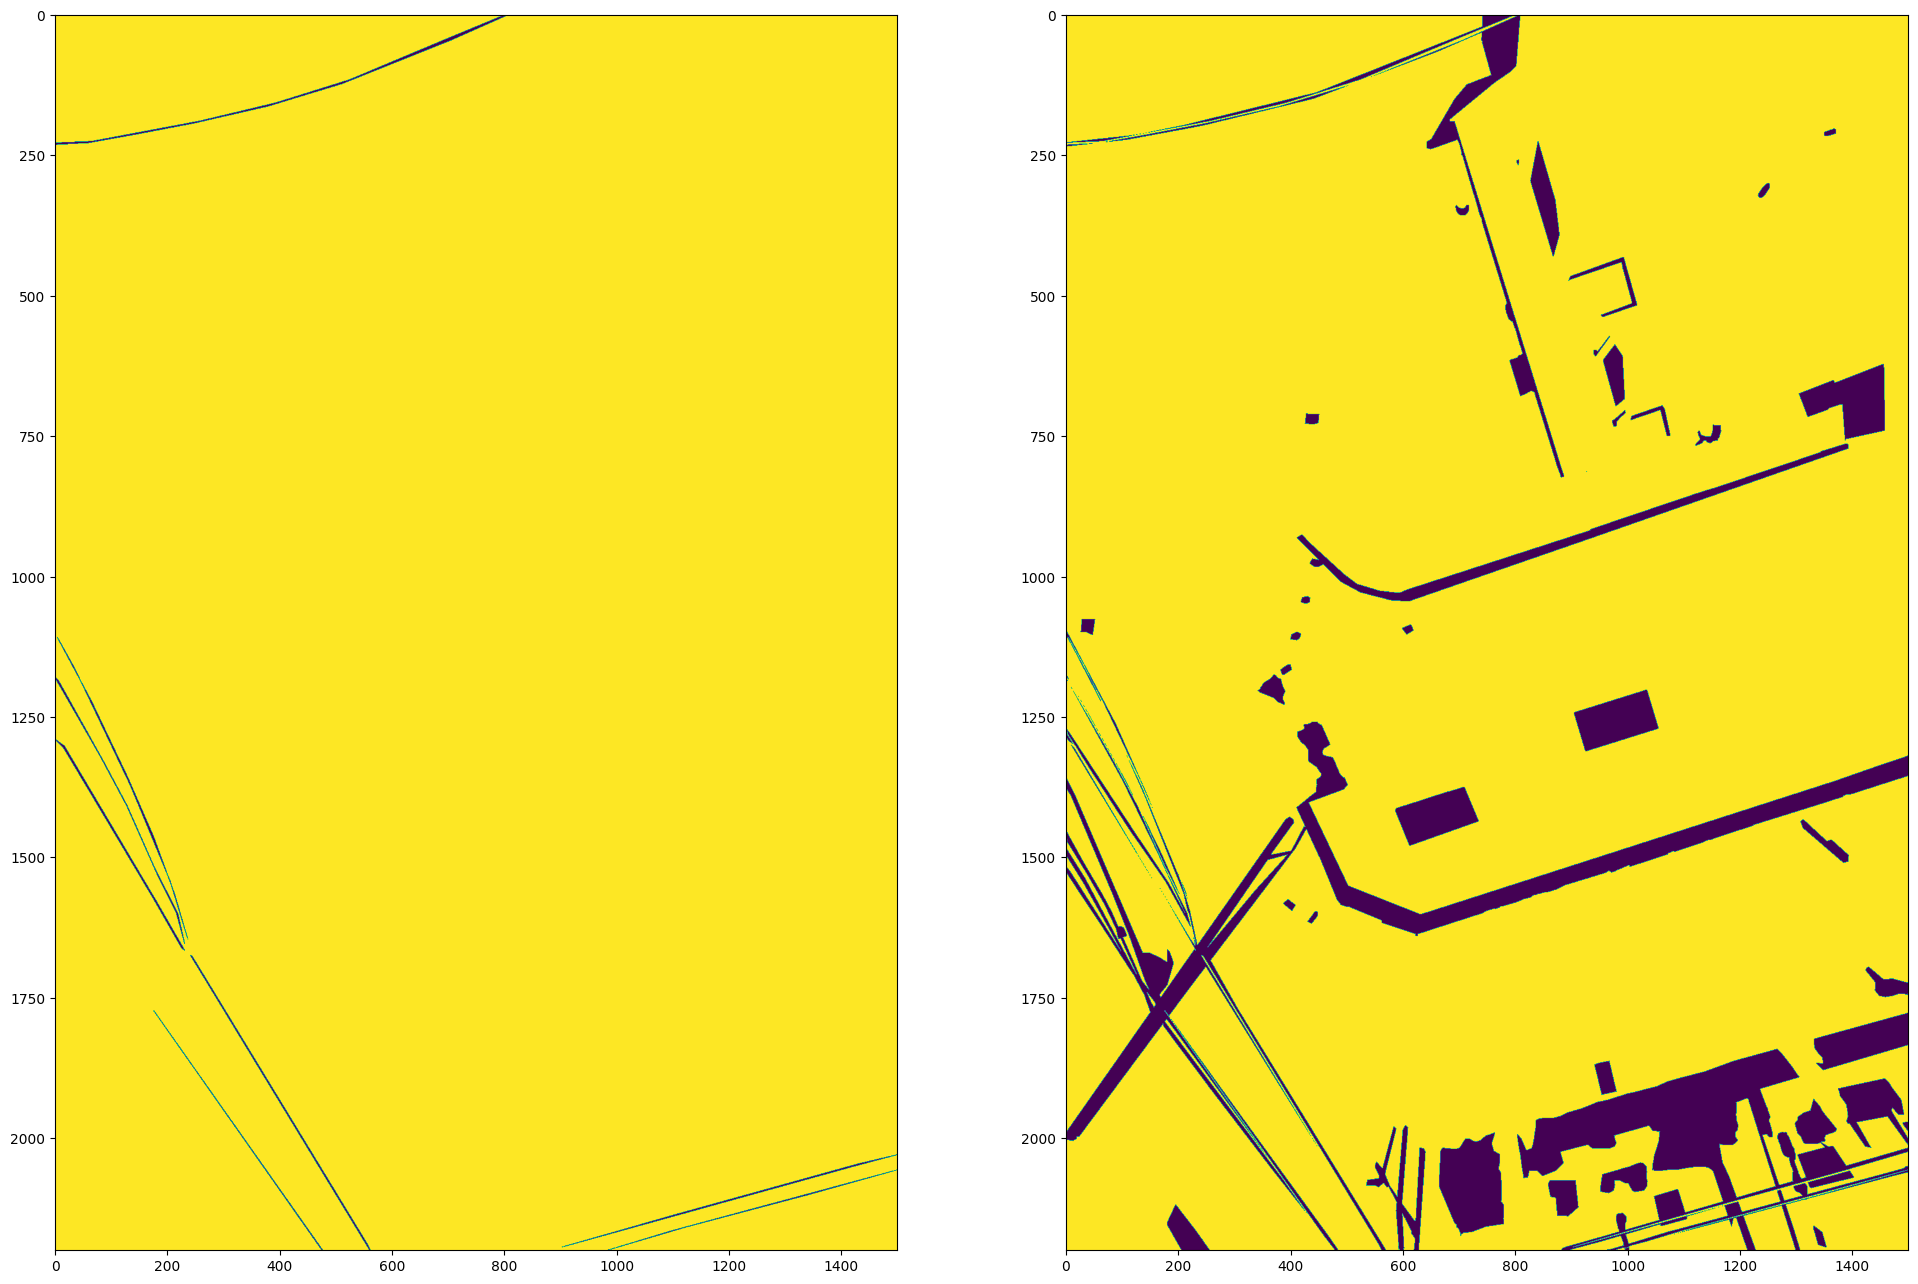

In [94]:


plt.figure(figsize=(50,50))
# print(np.where(mask==1,1,0).sum())
plt.subplot(1,4,1)
plt.imshow(np.where(bad_mask==8
                    ,0,255))
plt.subplot(1,4,2)
plt.imshow(np.where(goodmask==255
                    ,0,255))





In [ ]:
5b6112c35a524fa4acedb076fb72feac : series: change soil to gravel   ### loaded in this notebook
        
1c4b651a263f41c791776fee50e4fca6-1612396209800010938.png : series : change soil to grass    ### loaded in this notebook
 



'db86f9a4c2fd4e60bcf24b057d08c305-1621364840800015270.png': completely wrong mask   
 
51433d0f4dda49239ce1a1de4ec291e0-1617816625300005639.png : I don't get it...
        
6ae31c29c6af45bcb30aa8d326284fcf-1658289196700011380.png: series : pb grass / gravel
        
aebae6ef758540f28814cc34e43b1952-1619035678800002304.png: the road shall be asphalt
    
'ca17c81d845b48f48097b30db1ddbd37-1634665870100002002.png' #grass bottom right + chg soil to gravel

d7654235185945ae94acff5bc50e1c73-1618249639400009980.png: soil or gravel on top left
    
e25f17a327004f8988b168e9c7ddd52c-1619038563500008344.png: prob grass / soil insoluble
    
ed4a3859216a48db8b6d04eed5aacdc5-1618343945500005725.png: series:  lot of gravel annotated as grass   
    
    

In [ ]:

# non traitees:

# tricky ones:
# fc4c7367a1784219be46a733ba33fcf1-1621975779700010235.png  tranpoline on top and the parasol 
'8d0b987dba1b41d1b1ffeee623337946-1621278940100002364.png', # series of wire with missing humans under wires ? 

## missing person under wires 
       

## fold 1

'019c9f9128464ab59a58f2e95f83d55a-1631898858600005621.png', keep, ## no idea what is wrong...

['0b23fb62b2624c7588da634875907631-1623259951500004211.png', keep ## no idea what wrong / really similar to 283c221560de4260b9de627416669e53-1627405376600001645.png

['1012f99c2c6149fd8d9673bdf54155d5-1616446840900003156.png', ## this is correct

['1803214a8b7a474892fbe776e1aac23f-1607636523000003682.png', ## don't see problem but low accuracy
['1803214a8b7a474892fbe776e1aac23f-1607636505200003332.png',
['1803214a8b7a474892fbe776e1aac23f-1607636510000003411.png',
['1803214a8b7a474892fbe776e1aac23f-1607636512700003480.png',
['1803214a8b7a474892fbe776e1aac23f-1607636518200003577.png',  ## don't see problem but low accuracy



## fold 2:
'2f7bcc19c27d4098b27698cf3db768c0-1613586178700002593.png', keep ## series has a lot of inconsistencies in 2, 13 and others 
'26d2a65804bf4858b94eb1121185c174-1613600584800011218.png' # same as 072b9f864f8f445485df414fbed70cd4-1613601062100003400.png shall keep asphalt...




## fold 3:
 9870a475e7934cc6bc85aea6bdf80d93-1625162750500006381.png, ???

## fold 4:

'5b6112c35a524fa4acedb076fb72feac-1617744843300005726.png',
'52224b3085674b8881aebbd585b21118-1643925480800008677.png', keep?? ## arguably concrete look like gravel...
'51433d0f4dda49239ce1a1de4ec291e0-1617816625300005639.png', ## arguably soil to grass
'4a0f4f1b89e54e619b71d8dacee5e618-1643926056700005629.png', keep ?? ## identical to 52224b3085674b8881aebbd585b21118-1643925480800008677.png

## fold 5:

## fold 6:
 '834a953a2d7446a89ea3bde1c2084b81-1617744160200004141.png' # nothing wrong... => let see predictions

'8de58b4322f74c0183ab633b8aefd0b6-1658374287100001407.png' ## nothing wrong ???
 
'96fe8f9225c2416da801083de8b266ad-1618343229300009767.png' ## nothing wrong ...
 
 
 
## fold 7:

## fold 8: 
 aa31bff74bec453ea28f27b7e17b1477-1658289930900002261.png : entire series problem grass / soil not recognised

 ## fold 8




 

 
 


1d00b0a3a3f643f1ae268f87f3fd77f7-1614808728800010585.png fat wire
294f0a76a9214d71a00f27a4e14a7c45-1619548503300003403.png fat wire
2edb4632d8704502b777c84371521b39-1619462441500005943.png fat wire
5bcde0ccaef84b2692897574e4745b41-1622064925000003538.png fat wire
95be161966dc4ccf90ba1efbe1cb65a5-1619547412100010886.png fat wire
95be161966dc4ccf90ba1efbe1cb65a5-1619547422000011060.png fat wire
7fe11e1aa96b42b7951f617db1bea549-1627595510300009807.png fat wire
95be161966dc4ccf90ba1efbe1cb65a5-1619547412100010886.png fat wire
95be161966dc4ccf90ba1efbe1cb65a5-1619547422000011060.png fat wire
96fe8f9225c2416da801083de8b266ad-1618343217300009511.png fat wire
98fdd7d3fe50494583aa81092e5a08da-1631204783000002151.png fat wire
9b5d64b124404976910296c14616b457-1654620515600009557.png  fat wire
9b5d64b124404976910296c14616b457-1654620516900009588.png fat wire
9fb3f1b0c18b47d9ab437c383e3112aa-1619547927400002788.png fat wire
d9f11224a93543dead4cbb1ea3a6ce84-1654619300000021325.png fat wire
ed4a3859216a48db8b6d04eed5aacdc5-1618343937200005558.png FAT WIRE
ed4a3859216a48db8b6d04eed5aacdc5-1618343942200005654.png FAT WIRE
f9fae46e09b14bd0b5d45ea2d7109d5e-1620145165500004668.png pilone need to be moved to 255
f9fae46e09b14bd0b5d45ea2d7109d5e-1620145171300004778.png pilone need to be moved to 255



In [ ]:



3d48491db6be4e5c807b29c49511d2e6-1612892341000001603.png good image for wire
3d48491db6be4e5c807b29c49511d2e6-1612892344500001679.png good image for wire
5bcf60c926e34fb3ad1c8fc935502261-1658359118700006983.png good image for wire
5ddfb70f423c40c4971219be81dee26f-1631916440500004233.png good image for wire
748f7ecdd8434553a7a8d341eda4419e-1621279542400003621.png good image for wire
748f7ecdd8434553a7a8d341eda4419e-1621279538000003535.png good image for wire
748f7ecdd8434553a7a8d341eda4419e-1621279548200003726.png  good image for wire
98fdd7d3fe50494583aa81092e5a08da-1631204780100002098.png good image for wire
87657a04c38c478fa99e4b86ff95ade1-1621278522800006959.png good image for wire
b4556c0520b9486294ba24edb26be619-1630862699100003370.png  good image for wire
b79e3c6310574145b1ccc5dddb4502f1-1621280555500004594.png  good image for wire
b79e3c6310574145b1ccc5dddb4502f1-1621280556200004605.png  good image for wire